In [159]:
import pandas as pd

companies= pd.read_csv("C:/Users/hpakki/Desktop/migration/assignment1/companies.txt",sep='\t',encoding='ISO-8859-1')

rounds2=pd.read_csv("C:/Users/hpakki/Desktop/migration/assignment1/rounds2.csv",encoding='ISO-8859-1')

rounds2['lower_permalink'] = list(map(lambda x: x.lower(), rounds2['company_permalink']))
companies['lower_permalink'] = list(map(lambda x: x.lower(), companies['permalink']))

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,lower_permalink
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/organization/-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/organization/-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000,/organization/-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000,/organization/0-6-com


In [2]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,lower_permalink
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies


In [160]:
master_frame=pd.merge(companies,rounds2, left_on='lower_permalink', right_on='lower_permalink', how='outer')

In [161]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,lower_permalink,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000


In [162]:
master_frame=master_frame.dropna(subset=['lower_permalink'])

In [163]:
rounds2['lower_permalink'].nunique() #Number of unique companies in round2

66370

In [164]:
companies['lower_permalink'].nunique() #number of unique companies in companies

66368

In [165]:
master_frame.count() #the max number of records below is the number of observation in master frame after removing NULLs

permalink                  114947
name                       114946
homepage_url               108813
category_list              111538
status                     114947
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94426
lower_permalink            114954
company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
dtype: int64

In [166]:
print(master_frame[['funding_round_type','raised_amount_usd']])

       funding_round_type  raised_amount_usd
0                 venture       10000000.000
1                 venture                nan
2                    seed         700000.000
3                 venture        3406878.000
4                 venture        2000000.000
...                   ...                ...
114949               seed                nan
114950               seed        1625585.000
114951               seed                nan
114952            venture                nan
114953               seed                nan

[114954 rows x 2 columns]


In [167]:
group1=master_frame.groupby('funding_round_type') #Groupby Funding Type

In [168]:
pd.options.display.float_format = '{:.3f}'.format
print(group1['raised_amount_usd'].mean()) #Average Funding amount by Funding Type

funding_round_type
angel                      958694.470
convertible_note          1453438.543
debt_financing           17043526.023
equity_crowdfunding        538368.211
grant                     4300576.339
non_equity_assistance      411203.055
post_ipo_debt           168704571.822
post_ipo_equity          82182493.871
private_equity           73308593.029
product_crowdfunding      1363131.070
secondary_market         79649630.100
seed                       719817.997
undisclosed              19242370.226
venture                  11748949.129
Name: raised_amount_usd, dtype: float64


Top9 Countries based on investments

In [149]:
countries=master_frame[['country_code','raised_amount_usd']]

countries.dropna(subset=['country_code'],inplace=True)

countries['raised_amount_usd']=countries['raised_amount_usd'].astype('float64')


top=countries.groupby(['country_code'],as_index=False).sum()

top9=top.sort_values(['raised_amount_usd'], ascending =False).head(9) 
top9 #top 9 countries based on investment amount

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,country_code,raised_amount_usd
130,USA,669482123821.000
23,CHN,75703565796.000
42,GBR,32767048060.000
55,IND,27686336560.000
20,CAN,18424675109.000
108,RUS,11279120120.000
31,DEU,10017763740.000
59,ISR,9713884650.000
41,FRA,9059770757.000


In [172]:
master_frame['category_list']=master_frame['category_list'].astype('str')
master_frame['category_list']=list(map(lambda x: x.lower(), master_frame['category_list']))

companies['category_list']=companies['category_list'].astype('str')

In [151]:
mapping=pd.read_csv("C:/Users/hpakki/Desktop/migration/assignment1/mapping.csv",encoding='ISO-8859-1')

In [79]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [173]:
mapping['category_list'] =mapping['category_list'].astype(str)
mapping = mapping.apply(lambda x: x.astype(str).str.lower())

In [174]:
mt = pd.merge(master_frame,mapping,how = 'right', left_on=['category_list'],right_on=['category_list'])

In [175]:
mt['Automotive & Sports'] =mt['Automotive & Sports'].astype(int)
mt['Blanks'] =mt['Blanks'].astype(int)
mt['Cleantech / Semiconductors'] =mt['Cleantech / Semiconductors'].astype(int)
mt['Entertainment'] =mt['Entertainment'].astype(int)
mt['Health'] =mt['Health'].astype(int)
mt['Others'] =mt['Others'].astype(int)
mt['Manufacturing'] =mt['Manufacturing'].astype(int)
mt['News, Search and Messaging'] =mt['News, Search and Messaging'].astype(int)
mt['Social, Finance, Analytics, Advertising'] =mt['Social, Finance, Analytics, Advertising'].astype(int)
mt['totalscore'] = mt['Automotive & Sports']+mt['Others']+mt['Blanks']+mt['Cleantech / Semiconductors']+mt['Entertainment']+mt['Health']+mt['Manufacturing']+mt['News, Search and Messaging']+mt['Social, Finance, Analytics, Advertising']

In [176]:
mt.dropna(subset=["permalink"], inplace=True)
mt.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",totalscore
0,/Organization/-Fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,...,0,0,0,1,0,0,0,0,0,1
1,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,0,0,0,1,0,0,0,0,0,1
2,/Organization/Anthill-Magazine,Anthill Magazine,http://anthillonline.com/,media,operating,AUS,7,Melbourne,Melbourne,23-05-2009,...,0,0,0,1,0,0,0,0,0,1
3,/Organization/Attractive-Black-Singles-Llc,Attractive Black Singles LLC,NaN,media,operating,USA,NC,Greensboro,Greensboro,12-04-2012,...,0,0,0,1,0,0,0,0,0,1
4,/Organization/Basel-Switzerland,The Speedel Group,http://www.speedelgroup.com/,media,closed,CHE,4,Basel,Basel,NaN,...,0,0,0,1,0,0,0,0,0,1


In [177]:
country_1 = mt.loc[mt['country_code'] == 'USA']
country_2 = mt.loc[mt['country_code'] == 'GBR']
country_3 = mt.loc[mt['country_code'] == 'IND']

## Country 1 Analysis

In [178]:
in_c_1 = country_1[['permalink','country_code','raised_amount_usd','funding_round_type','totalscore']]
in_c_1['raised_amount_usd'] = in_c_1['raised_amount_usd'].astype('float64')
#Grouping the data
count_c_1 = in_c_1.groupby(['funding_round_type'],as_index=False).sum()
count_c_1 = count_c_1.sort_values(by = ['totalscore'], ascending= False)
#Finding required values
count_of_c_1 = count_c_1['totalscore'].sum()
sum_of_c_1 = count_c_1['raised_amount_usd'].sum()

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
#analysis for first sector name
comp_c1 = country_1.loc[country_1['funding_round_type']== 'venture']
comp_c1 = comp_c1[['permalink','raised_amount_usd']]
comp_c1['raised_amount_usd'] = comp_c1['raised_amount_usd'].astype('float64')
comp_c1 = comp_c1.groupby(['permalink'],as_index=False).sum()
comp_c1= comp_c1.sort_values(by = ['raised_amount_usd'], ascending= False)
comp_c1 = comp_c1.head(5)

In [180]:
#analysis for second sector name
comp_c2 = country_1.loc[country_1['funding_round_type']== 'seed']
comp_c2 = comp_c2[['permalink','raised_amount_usd']]
comp_c2['raised_amount_usd'] = comp_c2['raised_amount_usd'].astype('float64')
comp_c2 = comp_c2.groupby(['permalink'],as_index=False).sum()
comp_c2= comp_c2.sort_values(by = ['raised_amount_usd'], ascending= False)
comp_c2 = comp_c2.head(5)

In [181]:
print(count_of_c_1) #total number of investments

33760


In [182]:
print(sum_of_c_1) #Total Amount of Investment

293764599957.0


In [183]:
print(count_c_1) #Sectors sorted based on number of investments


       funding_round_type  raised_amount_usd  totalscore
13                venture   197997029400.000       20148
11                   seed     3045438836.000        4521
2          debt_financing    29619958339.000        3710
3     equity_crowdfunding      237801799.000        1504
12            undisclosed     2599866114.000         986
8          private_equity    33139525801.000         737
4                   grant     4997063136.000         667
0                   angel      532626820.000         613
1        convertible_note      714111480.000         469
7         post_ipo_equity    10547491377.000         209
6           post_ipo_debt     9727872605.000          79
9    product_crowdfunding      162083138.000          62
5   non_equity_assistance       15185000.000          39
10       secondary_market      428546112.000          16


In [184]:
print(comp_c1) #Company that received highest funding in top sector

                                  permalink  raised_amount_usd
3844                /Organization/Freescale    17600000000.000
1265             /Organization/Better-Place      775000000.000
6102  /Organization/Metropcs-Communications      739000000.000
9237                 /Organization/Solyndra      660200000.000
2509              /Organization/Coreexpress      573000000.000


In [186]:
print(comp_c2) #Comapny that receive highest funding in second best sector

                              permalink  raised_amount_usd
2448         /Organization/Pharmanation       25000000.000
1453         /Organization/Heyanita-Inc       22300000.000
616          /Organization/Choicestream       15000000.000
1422        /Organization/Hbi-Solutions       12600000.000
1689  /Organization/Keahole-Solar-Power       11000000.000


## Country 2 Analysis

In [187]:
in_c_1 = country_2[['permalink','country_code','raised_amount_usd','funding_round_type','totalscore']]
in_c_1['raised_amount_usd'] = in_c_1['raised_amount_usd'].astype('float64')

count_c_1 = in_c_1.groupby(['funding_round_type'],as_index=False).sum()
count_c_1 = count_c_1.sort_values(['totalscore'], ascending= False)

count_of_c_1 = count_c_1['totalscore'].sum()
sum_of_c_1 = count_c_1['raised_amount_usd'].sum()

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [195]:
comp_c1 = country_2.loc[country_2['funding_round_type']== 'venture']
comp_c1 = comp_c1[['permalink','raised_amount_usd']]
comp_c1['raised_amount_usd'] = comp_c1['raised_amount_usd'].astype('float64')
comp_c1 = comp_c1.groupby(['permalink'],as_index=False).sum()
comp_c1= comp_c1.sort_values(by = ['raised_amount_usd'], ascending= False)
comp_c1 = comp_c1.head(5)

In [196]:
comp_c2 = country_2.loc[country_2['funding_round_type']== 'seed']
comp_c2 = comp_c2[['permalink','raised_amount_usd']]
comp_c2['raised_amount_usd'] = comp_c2['raised_amount_usd'].astype('float64')
comp_c2 = comp_c2.groupby(['permalink'],as_index=False).sum()
comp_c2= comp_c2.sort_values(by = ['raised_amount_usd'], ascending= False)
comp_c2 = comp_c2.head(5)

In [197]:
print(count_of_c_1) #total number of investments

2513


In [198]:
print(sum_of_c_1) #Total Investment

19492900803.0


In [199]:
print(count_c_1) #Sectors sorted based on number of investments

       funding_round_type  raised_amount_usd  totalscore
12                venture    12114999733.000        1246
10                   seed      342562657.000         447
11            undisclosed      994059927.000         352
3     equity_crowdfunding       65476415.000         148
0                   angel       49974826.000          94
8          private_equity     3186858928.000          70
4                   grant      782678868.000          55
2          debt_financing      545282136.000          50
7         post_ipo_equity     1218757942.000          25
9    product_crowdfunding       68922235.000          17
1        convertible_note        3327136.000           7
5   non_equity_assistance              0.000           1
6           post_ipo_debt      120000000.000           1


In [200]:
print(comp_c1) #Companies sorted based on investment received in top sector

                                  permalink  raised_amount_usd
719                /Organization/Softvianet      915000000.000
544                    /Organization/Oneweb      500000000.000
197                 /Organization/Deliveroo      199585753.000
534  /Organization/Official-Limited-Virtual      170604000.000
62                  /Organization/Atom-Bank      167163877.000


In [201]:
print(comp_c2) #companies sorted based on investment received in second best sector

                             permalink  raised_amount_usd
182  /Organization/Magnus-Life-Science       24833177.000
92    /Organization/Entrepreneur-First        9646746.000
16      /Organization/Aspects-Software        7761532.000
14                 /Organization/Arkex        7356643.000
39               /Organization/Camsemi        5987939.000


##Country 3 Analysis

In [203]:
in_c_1 = country_3[['permalink','country_code','raised_amount_usd','funding_round_type','totalscore']]
in_c_1['raised_amount_usd'] = in_c_1['raised_amount_usd'].astype('float64')

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
count_c_1 = in_c_1.groupby(['funding_round_type'],as_index=False).sum()
count_c_1 = count_c_1.sort_values(by = ['totalscore'], ascending= False)

In [205]:
count_of_c_1 = count_c_1['totalscore'].sum()
sum_of_c_1 = count_c_1['raised_amount_usd'].sum()

In [206]:
comp_c1 = country_3.loc[country_3['funding_round_type']== 'venture']
comp_c1 = comp_c1[['permalink','raised_amount_usd']]
comp_c1['raised_amount_usd'] = comp_c1['raised_amount_usd'].astype('float64')
comp_c1 = comp_c1.groupby(['permalink'],as_index=False).sum()
comp_c1= comp_c1.sort_values(by = ['raised_amount_usd'], ascending= False)
comp_c1 = comp_c1.head(5)

In [213]:
comp_c2 = country_3.loc[country_3['funding_round_type']== 'seed']
comp_c2 = comp_c2[['permalink','raised_amount_usd']]
comp_c2['raised_amount_usd'] = comp_c2['raised_amount_usd'].astype('float64')
comp_c2 = comp_c2.groupby(['permalink'],as_index=False).sum()
comp_c2= comp_c2.sort_values(by = ['raised_amount_usd'], ascending= False)
comp_c2 = comp_c2.head(5)

In [214]:
print(count_of_c_1) #total number of investments

1067


In [215]:
print(sum_of_c_1) #Total Investment

12430253713.0


In [216]:
print(count_c_1) #Sectors sorted based on number of investments

      funding_round_type  raised_amount_usd  totalscore
11               venture     5316175020.000         490
9                   seed      145673733.000         323
0                  angel       33539634.000         130
10           undisclosed      913183326.000          50
6         private_equity     4678030000.000          38
3    equity_crowdfunding         109000.000          15
2         debt_financing     1142377000.000          14
1       convertible_note       50006000.000           2
8       secondary_market         210000.000           2
4                  grant       25900000.000           1
5        post_ipo_equity      125000000.000           1
7   product_crowdfunding          50000.000           1


In [217]:
print(comp_c1) #Companies sorted based on investment received in top sector

                       permalink  raised_amount_usd
254    /Organization/Quikr-India      346000000.000
285       /Organization/Snapdeal      310699998.000
205         /Organization/Myntra      158750000.000
231  /Organization/Pepperfry-Com      128000000.000
207        /Organization/Naaptol      106200000.000


In [218]:
print(comp_c2) #companies sorted based on investment received in second best sector

                                    permalink  raised_amount_usd
282                /Organization/Welcome-Cure        6000000.000
138                    /Organization/Inurture        4897824.000
92   /Organization/Gayatrishakti-Paper-Boards        4000000.000
61                  /Organization/Eatshoplove        3500000.000
112                    /Organization/Holachef        3420000.000


Text(0, 0.5, 'Raised_amount_usd')

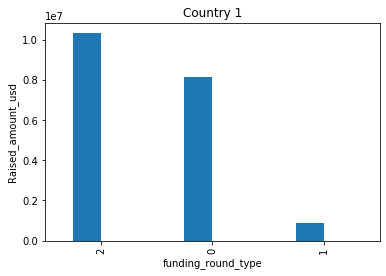

In [221]:
## Plot for country 1

Plot_c11 = country_1.loc[country_1['funding_round_type']== 'venture']
Plot_c12 = country_1.loc[country_1['funding_round_type']== 'seed']
Plot_c13 = country_1.loc[country_1['funding_round_type']== 'debt_financing']
plot_c1 = pd.concat([Plot_c11, Plot_c12,Plot_c13])
plot_c1 = plot_c1[['permalink','country_code','raised_amount_usd','funding_round_type','totalscore']]
plot_c1['raised_amount_usd'] = plot_c1['raised_amount_usd'].astype('float64')
plot_c1 = plot_c1.groupby(['funding_round_type'],as_index=False).mean()
plot_c1

my_plot_1 = plot_c1.sort_values(by='raised_amount_usd',ascending=False).plot(kind='bar',legend=None,title="Country 1")
my_plot_1.set_xlabel("funding_round_type")
my_plot_1.set_ylabel("Raised_amount_usd")

Text(0, 0.5, 'Raised_amount_usd')

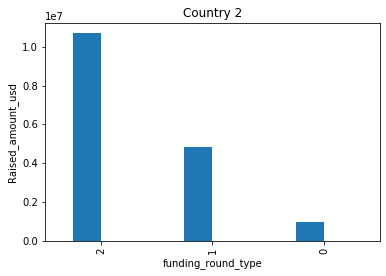

In [223]:
## Plot for country 2
Plot_c21 = country_2.loc[country_2['funding_round_type']== 'venture']
Plot_c22 = country_2.loc[country_2['funding_round_type']== 'seed']
Plot_c23 = country_2.loc[country_2['funding_round_type']== 'undisclosed']
plot_c2 = pd.concat([Plot_c21, Plot_c22,Plot_c23])
plot_c2 = plot_c2[['permalink','country_code','raised_amount_usd','funding_round_type','totalscore']]
plot_c2['raised_amount_usd'] = plot_c2['raised_amount_usd'].astype('float64')
plot_c2 = plot_c2.groupby(['funding_round_type'],as_index=False).mean()
plot_c2

my_plot_2 = plot_c2.sort_values(by='raised_amount_usd',ascending=False).plot(kind='bar',legend=None,title="Country 2")
my_plot_2.set_xlabel("funding_round_type")
my_plot_2.set_ylabel("Raised_amount_usd")

Text(0, 0.5, 'Raised_amount_usd')

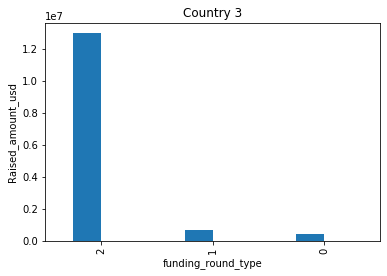

In [224]:
## Plot for country 3

Plot_c31 = country_3.loc[country_3['funding_round_type']== 'venture']
Plot_c32 = country_3.loc[country_3['funding_round_type']== 'seed']
Plot_c33 = country_3.loc[country_3['funding_round_type']== 'angel']
plot_c3 = pd.concat([Plot_c31, Plot_c32,Plot_c33])
plot_c3 = plot_c3[['permalink','country_code','raised_amount_usd','funding_round_type','totalscore']]
plot_c3['raised_amount_usd'] = plot_c3['raised_amount_usd'].astype('float64')
plot_c3 = plot_c3.groupby(['funding_round_type'],as_index=False).mean()
plot_c3

my_plot_3 = plot_c3.sort_values(by='raised_amount_usd',ascending=False).plot(kind='bar',legend=None,title="Country 3")
my_plot_3.set_xlabel("funding_round_type")
my_plot_3.set_ylabel("Raised_amount_usd")